In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [7]:
schwab = pd.read_csv("SWPPX.csv")

In [8]:
schwab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [9]:
schwab["Date"] = pd.to_datetime(schwab['Date'])

In [10]:
print(f'Stock prices between {schwab.Date.min()} {schwab.Date.max()}')
print(f'Total Days: {(schwab.Date.max() - schwab.Date.min()).days}')

Stock prices between 2022-06-22 00:00:00 2023-06-22 00:00:00
Total Days: 365


In [11]:
schwab.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,252,251.000000,251.000000,251.000000,251.000000,251.000000,251.0
mean,2022-12-20 18:00:00,61.544183,61.544183,61.544183,61.544183,61.086581,0.0
min,2022-06-22 00:00:00,55.419998,55.419998,55.419998,55.419998,54.537273,0.0
25%,2022-09-20 18:00:00,59.625000,59.625000,59.625000,59.625000,59.118131,0.0
50%,2022-12-19 12:00:00,61.450001,61.450001,61.450001,61.450001,61.099998,0.0
75%,2023-03-22 06:00:00,63.455000,63.455000,63.455000,63.455000,63.144114,0.0
max,2023-06-22 00:00:00,68.269997,68.269997,68.269997,68.269997,68.269997,0.0
std,NaN,2.631462,2.631462,2.631462,2.631462,2.814503,0.0


<Axes: >

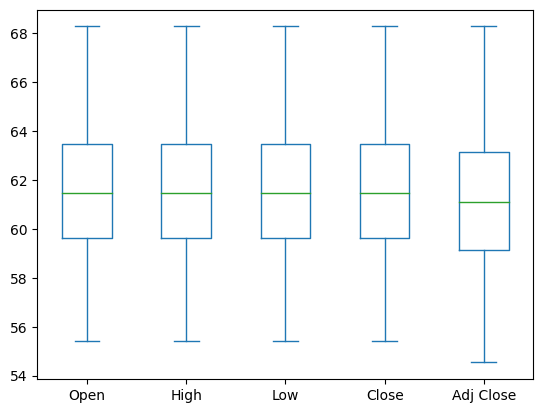

In [12]:
schwab[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [13]:
layout = go.Layout(
    title='Stock Prices of Schwab',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family="Courier New, monospace",
            size=18,
            color='#7f7f7f'
        )
    )
)

schwab_data = [{'x':schwab['Date'], 'y':schwab['Close']}]
plot = go.Figure(data=schwab_data, layout=layout)


In [14]:
iplot(plot)

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [16]:
X = np.array(schwab.index).reshape(-1, 1)
Y = schwab['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [17]:
scaler = StandardScaler().fit(X_train)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [20]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)

trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

schwab_data = [trace0, trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=schwab_data, layout=layout)

In [21]:
iplot(plot2)

In [22]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''

print(scores)

ValueError: Input contains NaN.